# Machine Learning Subject Matter Expert Internship
#### Ramanan R
#### ramanan.palur@gmail.com
##### -------------------------------------------------------------------

### Importing the data and analyzing

In [33]:
import pandas as pd
data=pd.read_csv('Employee-turnover.csv')

In [34]:
data.shape

(1470, 29)

In [35]:
data.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


## Converting string data to integer data for applying machine learning algorithms

In [36]:
x={}                                #empty dictionary
columns=data.columns.tolist()       #list of features
datatypes=data.dtypes.tolist()      #list of datatypes
for i in range(len(columns)):       #iterate through the list of features
    x[columns[i]]=datatypes[i]      #add the feature and its datatype to the dictionary

In [37]:
for key,value in x.items():                                                     #iterate through the dictionary
    if value=='object':                                                         #if the datatype is object (ie data is a string)                
        attributes=data[key].unique()                                           #get the unique values of the feature
        data[key].replace(attributes,range(len(attributes)),inplace=True)       #replace the unique values with a range of numbers(integers starting from 0)

## Manual Data Cleaning

In [38]:
#drop the feature 'Employee ID' and 'Employee Count' as These features do not contribute to the prediction
data.drop(['Employee Count'],axis=1,inplace=True)                  
data.drop(['Employee ID'],axis=1,inplace=True) 
data.head()                        

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,0,0,0,41,0,0,0,0,1,0,...,8,6,4,0,5,0,0,0,0,0
1,1,1,1,49,1,1,0,1,8,1,...,10,10,7,1,7,1,3,1,1,1
2,1,2,1,37,0,0,1,0,2,1,...,7,0,0,0,0,2,3,0,2,0
3,1,1,0,33,1,2,0,1,3,0,...,8,8,7,3,0,3,3,1,3,1
4,1,2,1,27,1,1,2,0,2,0,...,6,2,2,2,2,2,3,1,1,1


## Colours for the plots

In [39]:
#setting colour for the plot
c="black maroon red sienna peru darkorange gold olive yellow lawngreen green springgreen aquamarine teal aqua steelblue slategray cornflowerblue midnightblue blue blueviolet thistle plum magenta hotpink crimson khaki coral blue"
colors_list=c.split()
colors_list.sort()

## Splitting the data into training and testing sets and Data Standardization for PCA

In [40]:
import numpy as np
import matplotlib.pyplot as plt

#splitting the data into training and testing data

from sklearn.model_selection import train_test_split                                                                                            #import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Attrition (Yes/No)',axis=1), data['Attrition (Yes/No)'], test_size=0.2)          #split the data into training and testing data

#feature scaling (normalization) to avoid the effect of different data types on the model using standard scaler

from sklearn.preprocessing import StandardScaler                                        #import the standard scaler
scale_features_std = StandardScaler()                                                   #create an object of the standard scaler
X_train_std = scale_features_std.fit_transform(X_train)                                 #fit the standard scaler to the training data and transform the training data
X_test_std = scale_features_std.transform(X_test)                                       #transform the testing data using the standard scaler

## Performing PCA and analysis of variance

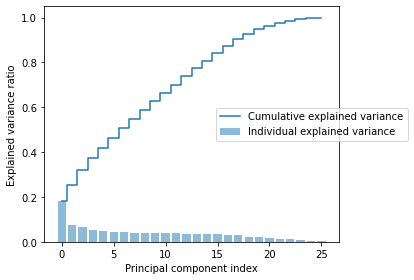

In [41]:
from sklearn.decomposition import PCA                                                                                       #import PCA
pca = PCA()                                                                                                                 #create an object of PCA
X_train_pca = pca.fit_transform(X_train_std)                                                                                #fit the PCA to the training data and transform the training data
exp_var_pca = pca.explained_variance_ratio_                                                                                 #get the explained variance ratio of the PCA

cum_sum_eigenvalues = np.cumsum(exp_var_pca)                                                                                #get the cumulative sum of the eigenvalues of the PCA

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')           #plot the explained variance ratio of the PCA
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')         #plot the cumulative sum of the eigenvalues of the PCA
plt.ylabel('Explained variance ratio')                                                                                      #label the y-axis
plt.xlabel('Principal component index')                                                                                     #label the x-axis
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)                                                          #plot the legend
plt.tight_layout()                                                                                                          #tight layout
plt.show()                                                                                                                  #show the plot

#Conclusion
#Only first 20 components are important and the remaining components contribute only 1% of the total variance
#In the first 20 componentss, the first component is the most important contributing almost 20% of the total variance
#Thus we know that there are some components that do not contribute much to the prediction of the attrition

## Random Forest Classification

              precision    recall  f1-score   support

           0       0.91      0.44      0.60        45
           1       0.91      0.99      0.95       249

    accuracy                           0.91       294
   macro avg       0.91      0.72      0.77       294
weighted avg       0.91      0.91      0.89       294



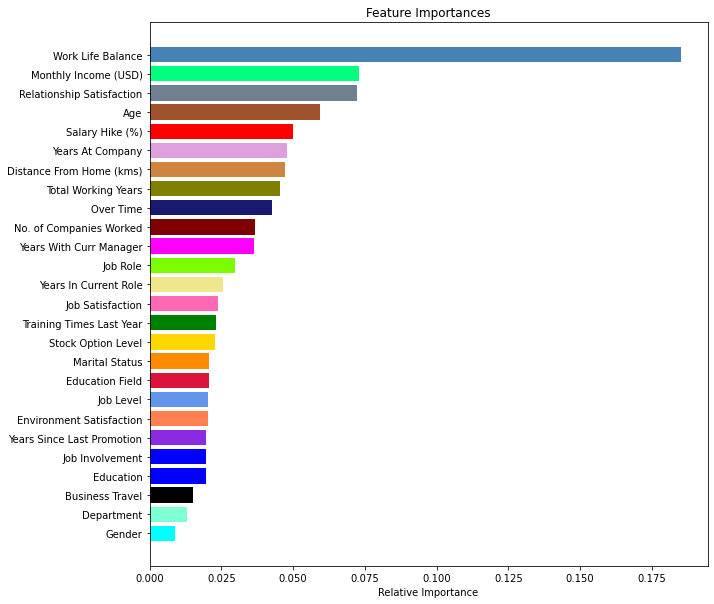

In [42]:
from sklearn.ensemble import RandomForestClassifier #import RandomForestClassifier                                                                          
from sklearn.metrics import classification_report #import classification_report                                                                           

RFmodel = RandomForestClassifier(n_estimators=1000, random_state=0) #create an object of the RandomForestClassifier with 1000 trees and random state as 0                                                         
RFmodel.fit(X_train, y_train) #fit the data in the model                                                                                           
y_pred = RFmodel.predict(X_test)    #predict the data in the model                                                                                      
print(classification_report(y_test, y_pred)) #print the classification report of the model                                                                            

features = data.drop('Attrition (Yes/No)', axis=1).columns      #get the features of the data after dropping the target variable which is 'Attrition (Yes/No)'                                                               
importances = RFmodel.feature_importances_  #finding importance features
indices = np.argsort(importances) #sorting the features in the data according to the importance of the features

#find accuracy of the model
from sklearn.metrics import accuracy_score
RFaccuracy=accuracy_score(y_test, y_pred)

plt.figure(figsize=(10,10))  #create a figure of size 10x10
plt.title('Feature Importances') #title the figure

plt.barh(range(len(indices)), importances[indices], color=colors_list, align='center') #plot the importance of the features in the data
plt.yticks(range(len(indices)), [features[i] for i in indices]) #label the y-axis
plt.xlabel('Relative Importance') #label the x-axis
plt.show() #show the plot

#Conclusion
#The features Work Life Balance the most important features contributing the most to the prediction of the attrition
#The features Relationship Satisfaction and MonthlyIncome are also important features contributing the most to the prediction of the attrition but they are not the most important features
#The features Department, Gender and Buisness Travel are the least important features 

## Decision Tree Classification

              precision    recall  f1-score   support

           0       0.41      0.47      0.44        45
           1       0.90      0.88      0.89       249

    accuracy                           0.82       294
   macro avg       0.66      0.67      0.66       294
weighted avg       0.83      0.82      0.82       294



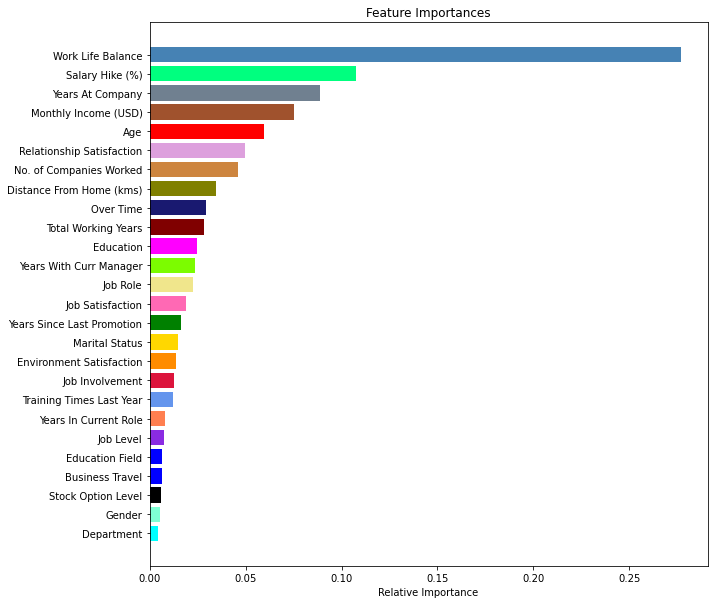

In [43]:
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier
decisiontree_model = DecisionTreeClassifier() #creating an object of the DecisionTreeClassifier
decisiontree_model.fit(X_train, y_train) #fitting the data in the model
y_pred = decisiontree_model.predict(X_test) #predicting the data in the model

from sklearn.metrics import classification_report #importing classification_report
print(classification_report(y_test, y_pred)) #printing the classification report of the model
importances = decisiontree_model.feature_importances_ #finding the importance of the features
indices = np.argsort(importances) #sorting the features in the data according to the importance of the features

#find accuracy of the model
from sklearn.metrics import accuracy_score
DTaccuracy=accuracy_score(y_test, y_pred)

plt.figure(figsize=(10,10)) #create a figure of size 10x10
plt.title('Feature Importances') #title the figure
plt.barh(range(len(indices)), importances[indices], color=colors_list, align='center') #plot the importance of the features in the data
plt.yticks(range(len(indices)), [features[i] for i in indices]) #label the y-axis
plt.xlabel('Relative Importance') #label the x-axis
plt.show() #show the plot

#Conclusion
#The features Work Life Balance the most important features contributing the most to the prediction of the attrition
#The features Relationship Satisfaction and MonthlyIncome are also important features contributing the most to the prediction of the attrition but they are not the most important features
#the least important features are the features Department and gender

## XG Boost Classification

              precision    recall  f1-score   support

           0       0.77      0.51      0.61        45
           1       0.92      0.97      0.94       249

    accuracy                           0.90       294
   macro avg       0.84      0.74      0.78       294
weighted avg       0.89      0.90      0.89       294



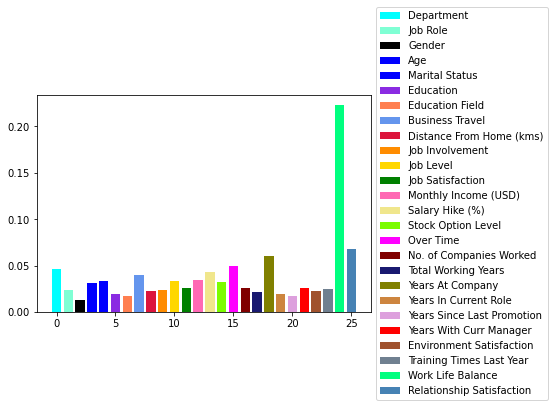

In [44]:
# xgboost for feature importance on a classification problem
from xgboost import XGBClassifier	#importing XGBClassifier

XGBmodel = XGBClassifier() #creating an object of the XGBClassifier
XGBmodel.fit(X_train, y_train) #fitting the data in the model
importance = XGBmodel.feature_importances_ #finding the importance of the features
y_pred = XGBmodel.predict(X_test) #predicting the data in the model

print(classification_report(y_test, y_pred)) #print the classification report of the model     

#find accuracy of the model
from sklearn.metrics import accuracy_score
XGBaccuracy=accuracy_score(y_test, y_pred)

for x in range(len(importance)): #for loop to print the importance of the features
	plt.bar(x,importance[x],label=features[x],color=colors_list[x]) 	#plot the importance of the features in the data
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #plot the legend
plt.show() #show the plot

#Conclusion
#The features Work Life Balance is the most important features contributing the most to the prediction of the attrition
#The features Relationship Satisfaction and Job level are also important features contributing the to the prediction of the attrition but they are not the most important features
#The least important features are the features Gender and Training times

## Logistic Regression Classification

c:\Users\raman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.25      0.07      0.11        45
           1       0.85      0.96      0.90       249

    accuracy                           0.83       294
   macro avg       0.55      0.52      0.50       294
weighted avg       0.76      0.83      0.78       294



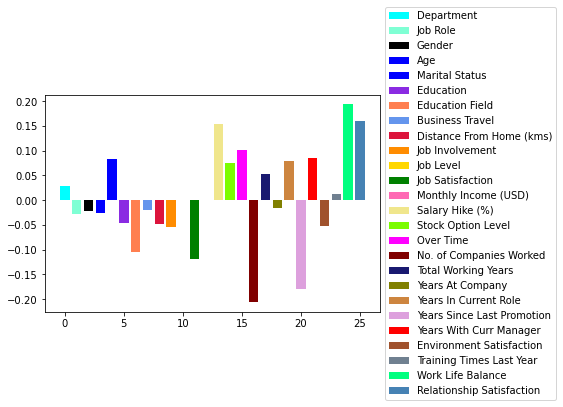

In [45]:
from sklearn.linear_model import LogisticRegression #importing LogisticRegression
logreg = LogisticRegression() #creating an object of the LogisticRegression
logreg.fit(X_train, y_train) #fitting the data in the model
y_pred = logreg.predict(X_test) #predicting the data in the model
 
print(classification_report(y_test, y_pred)) #printing the classification report of the model

importance = logreg.coef_[0] #finding the importance of the features

#find accuracy of the model
from sklearn.metrics import accuracy_score
LRaccuracy=accuracy_score(y_test, y_pred)

for x in range(len(importance)):  #for loop to print the importance of the features
	plt.bar(x,importance[x],label=features[x],color=colors_list[x]) 	#plot the importance of the features in the data
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) #plot the legend
plt.show() #show the plot

#Conclusion
#The feature Work Life Balance is the most important features contributing the most to the prediction of the attrition
#The features Relationship Satisfaction, Stock option, Over time are also important features contributing the to the prediction of the attrition but they are not the most important features
#The least important features are the features No. of companies worked, years since last promotion, job satisfaction

## Insights
### After four different analysis it is conlcuded that, 
#### -the major factor for predicting the attrition is the "Work life balance" & "Relationship Satisfaction"
#### -the "Work life balance" is the most important factor which is twice almost always twice as important as the second most important factor which implies that the time worked in the office and time spent outside the office matters a lot
#### -"Gender" & "Department" are the least affecting factors which means that the reason of attrition affects both genders and emplyees from all departments
#### -To retain more employees the company should reduce work time by increasing employees and dividing the work load
#### -The company can also overall increase the income either as salary or as hike % to imporve quality of life
# ----------------------------------------------------------------------


## Support Vector Machine Classification

In [46]:
from sklearn.svm import SVC as svm #importing SVC as svm

svc_model = svm() #creating an object of the SVC
svc_model.fit(X_train, y_train) #fitting the data in the model
y_prediction = svc_model.predict(X_test) #predicting the data in the model

#find accuracy of the model
from sklearn.metrics import accuracy_score
SVMaccuracy=accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_prediction)) #printing the classification report of the model

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.85      1.00      0.92       249

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294



c:\Users\raman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\raman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\raman\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-Nearest Neighbors Classification

In [47]:
from sklearn.neighbors import KNeighborsClassifier #importing KNeighborsClassifier
knn_model = KNeighborsClassifier() #creating an object of the KNeighborsClassifier
knn_model.fit(X_train, y_train) #fitting the data in the model
y_prediction = knn_model.predict(X_test) #predicting the data in the model

#find accuracy of the model
from sklearn.metrics import accuracy_score
KNNaccuracy=accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_prediction)) #printing the classification report of the model

              precision    recall  f1-score   support

           0       0.06      0.02      0.03        45
           1       0.84      0.93      0.88       249

    accuracy                           0.79       294
   macro avg       0.45      0.48      0.46       294
weighted avg       0.72      0.79      0.75       294



# Model Evaluation
### After applying the model to the test data, the accuracy of the model is evaluated
### The models used are: Logistic Regression, Random Forest, KNN, SVM, Decision Tree, and XGBoost

In [53]:
#print all accuracy scores in percentage
print(f"Decision Tree Accuracy: {round(DTaccuracy*100,3)} %")
print(f"XGBoost Accuracy: {round(XGBaccuracy*100,3)} %")
print(f"Logistic Regression Accuracy: {round(LRaccuracy*100,3)} %")
print(f"SVM Accuracy: {round(SVMaccuracy*100,3)} %")
print(f"KNN Accuracy: {round(KNNaccuracy*100,3)} %")
print(f"Random Forest Accuracy: {round(RFaccuracy*100,3)} %")

Decision Tree Accuracy: 81.633 %
XGBoost Accuracy: 90.136 %
Logistic Regression Accuracy: 82.653 %
SVM Accuracy: 82.653 %
KNN Accuracy: 82.653 %
Random Forest Accuracy: 90.816 %


### All models have an accuracy greater than 80%
### XGBoost and Random forest have the highest accuracy of all the models
#### Disclaimer: The accuracy of the models changes everytime the program is run because of the random nature of the data selection